## Hough Lines

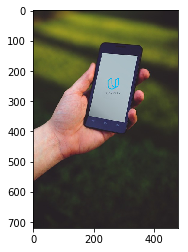

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = cv2.imread("images/phone.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

## Edge detection


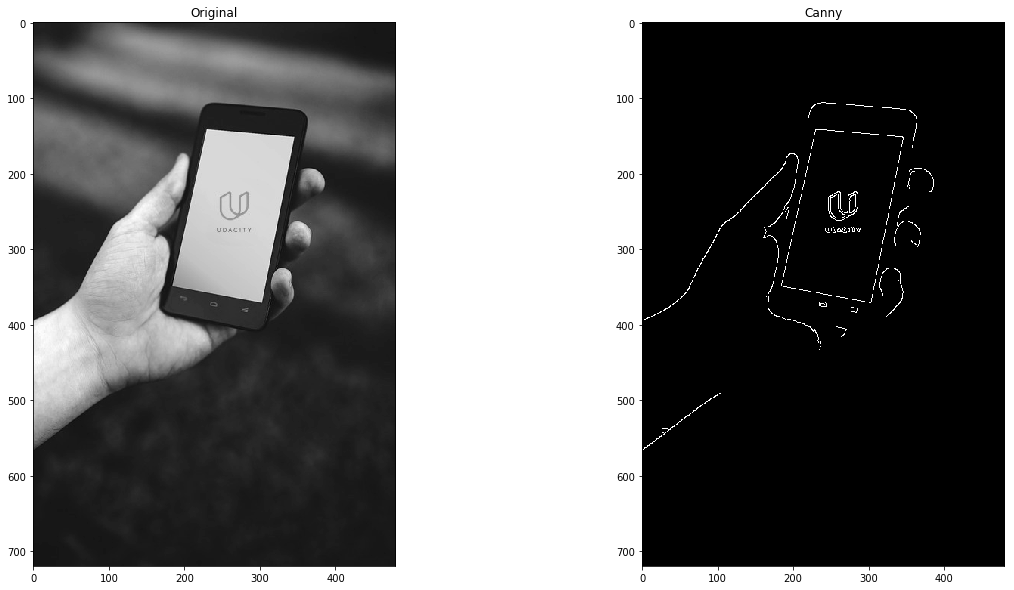

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 100, 200)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(gray, cmap="gray")

ax2.set_title("Canny")
ax2.imshow(edges, cmap="gray");

## Lines using hough transform

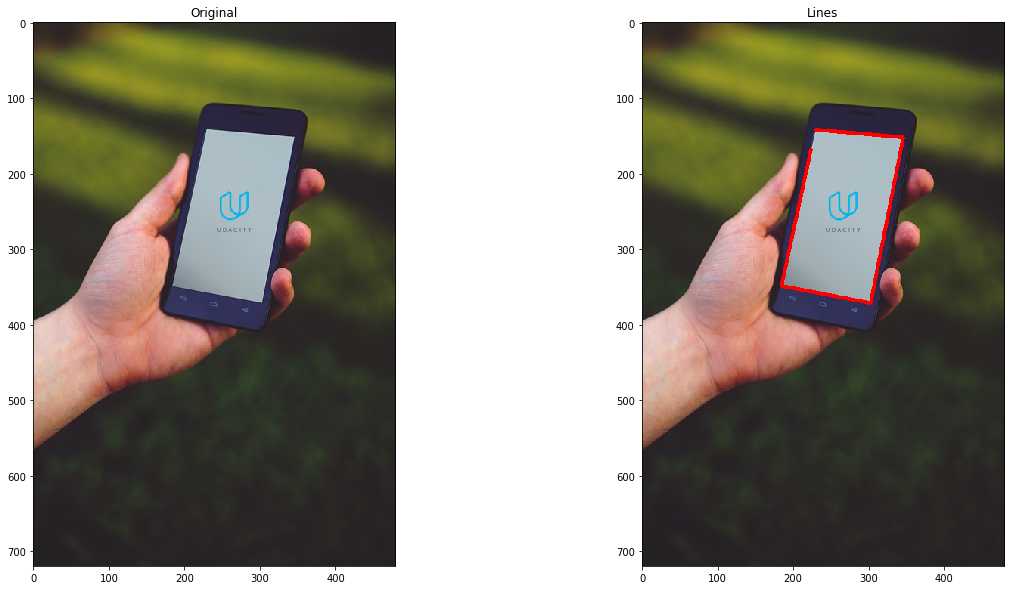

In [17]:
rho =1
theta = np.pi/180
threshold = 60
min_line = 100
max_lin_gap = 5

line_img = np.copy(img)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line, max_lin_gap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(img)

ax2.set_title("Lines")
ax2.imshow(line_img);

## Hough Circles function

* `input image` - resolution factor between detection and image (1)
* `minDist` - minimum distance between circles
* `param1` - the highest value passed to canny (the lower is twice smaller)
* `param2` - the accumulator threshold for the circle centers at the detection stage, smaller number = more false circles
* `min/max` - values for radius detected

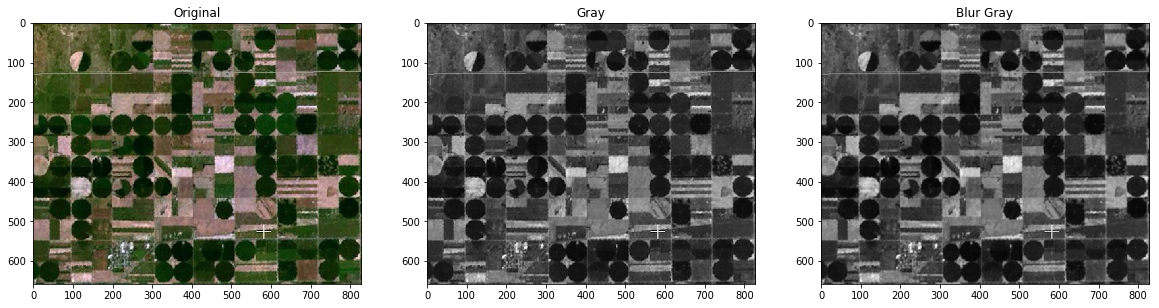

In [36]:
img = cv2.imread("images/round_farms.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_blur = cv2.GaussianBlur(gray, (3, 3), 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(img)
ax2.set_title("Gray")
ax2.imshow(gray, cmap="gray")
ax3.set_title("Blur Gray")
ax3.imshow(g_blur, cmap="gray");

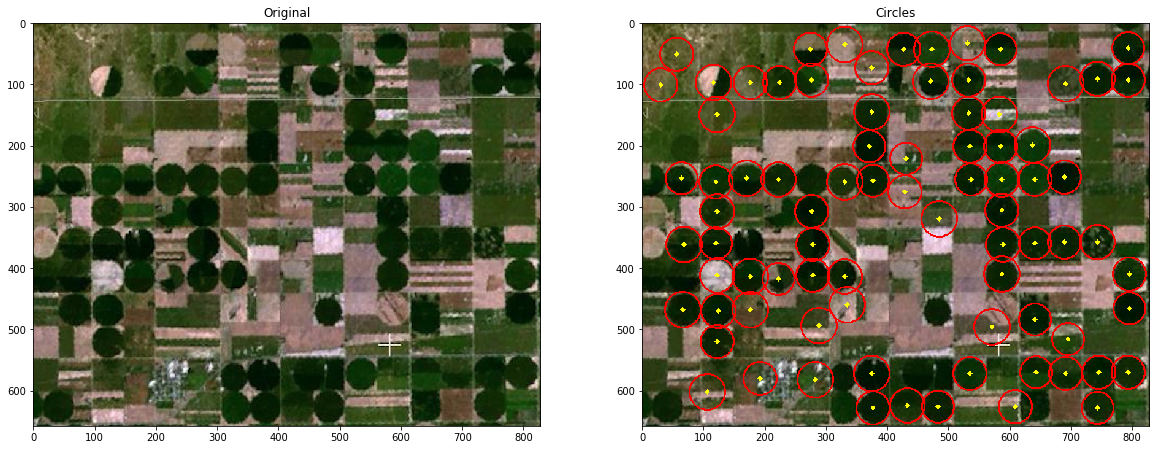

In [81]:
circles_img = np.copy(img)

circles = cv2.HoughCircles(g_blur, cv2.HOUGH_GRADIENT, 1,
                         minDist=45,
                         param1=50,
                         param2=11,
                         minRadius=25,
                         maxRadius=30)

circles = np.uint16(np.around(circles))

for x, y, r in circles[0, :]:
    # Outer circle
    cv2.circle(circles_img, (x, y), r, (255, 0, 0), 2)
    # Center circle
    cv2.circle(circles_img, (x, y), 2, (255, 255, 0), 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(img)

ax2.set_title("Circles")
ax2.imshow(circles_img);